In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

s_c = 'ALL'
property = 'Hum_pre_7'

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
df_sampled = df[(df.loc[:, weather_columns] != -1).all(axis=1) & (df.loc[:, weather_columns] != 0).all(axis=1)]

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: 9.994047619; max value: 93.51351351


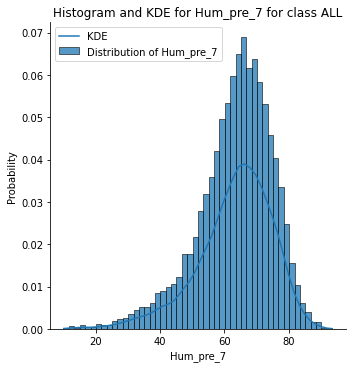

In [8]:
x = np.linspace(min_amount, max_amount, num=50)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 50)

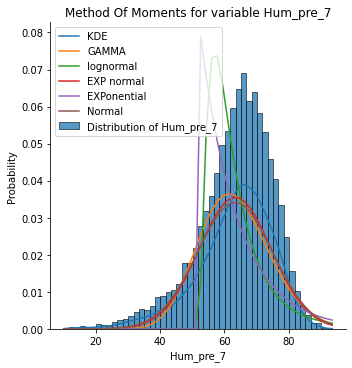

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.24, pvalue=0.11238524845512393), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.20139999999999958, pvalue=0.2676578770784733)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.5, pvalue=4.8075337049514946e-06), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=1.5153999999999996, pvalue=0.0001549589235869675)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.16, pvalue=0.5486851446031328), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.09660000000000224, pvalue=0.6121826683772482)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.5, pvalue=4.8075337049514946e-06), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=1.413800000000002, pvalue=0.00026501909924037115)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statisti

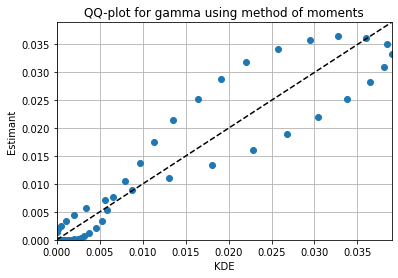

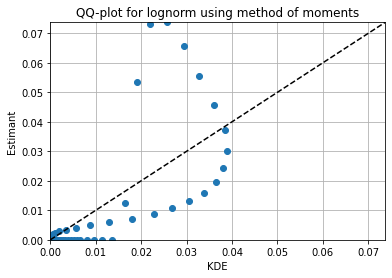

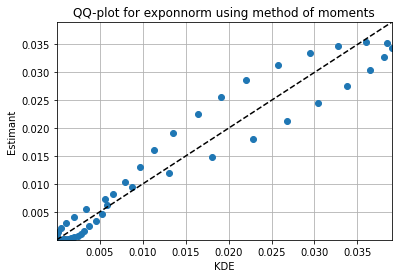

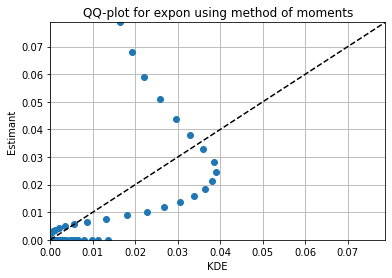

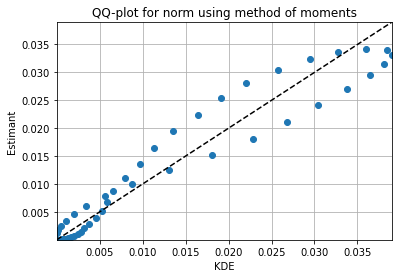

In [9]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

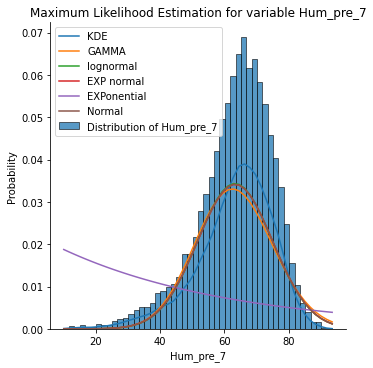

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.16, pvalue=0.5486851446031328), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.10699999999999932, pvalue=0.5608283253009358)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.16, pvalue=0.5486851446031328), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.08859999999999957, pvalue=0.6550180445705647)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.16, pvalue=0.5486851446031328), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.08539999999999992, pvalue=0.672953892101148)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.46, pvalue=3.800827929128319e-05), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=1.2698, pvalue=0.0005693418560481778)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.16, pvalue=0.54

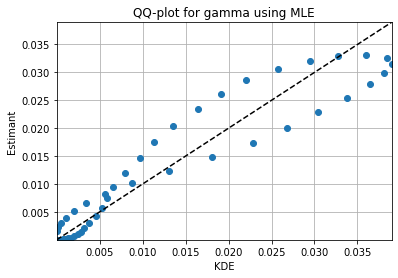

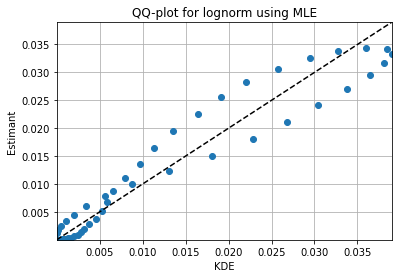

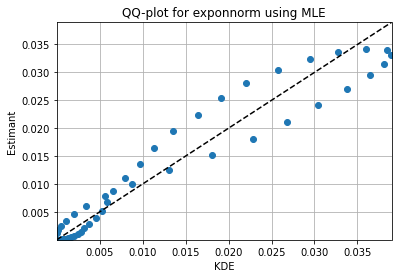

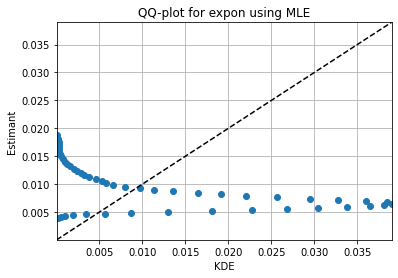

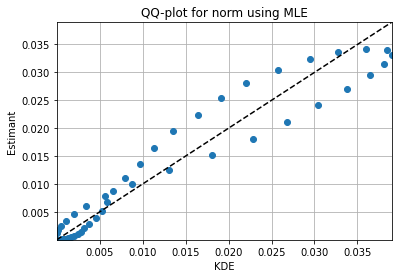

In [10]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

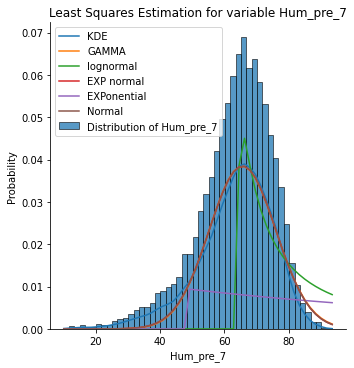

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.24, pvalue=0.11238524845512393), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.2137999999999991, pvalue=0.24474145471620323)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.64, pvalue=6.078719823015066e-10), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=2.8198000000000008, pvalue=1.7849144673398598e-07)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.22, pvalue=0.17858668181221732), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.1974000000000018, pvalue=0.27559013347301053)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.46, pvalue=3.800827929128319e-05), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=1.6274000000000015, pvalue=8.596491207235601e-05)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statis

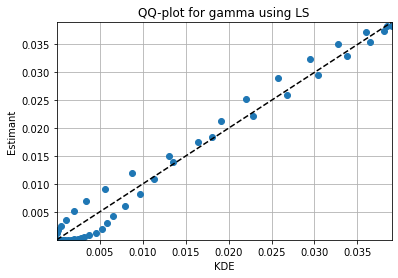

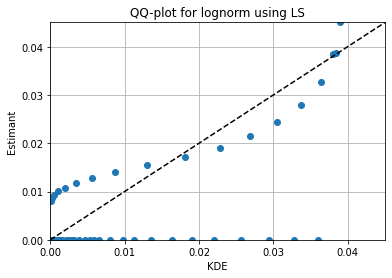

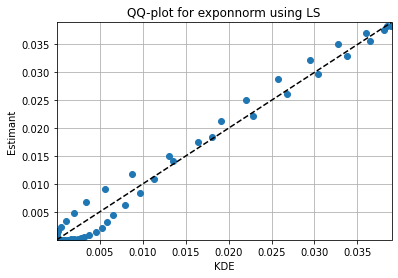

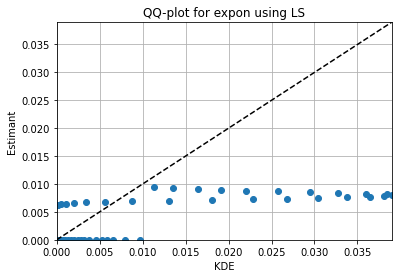

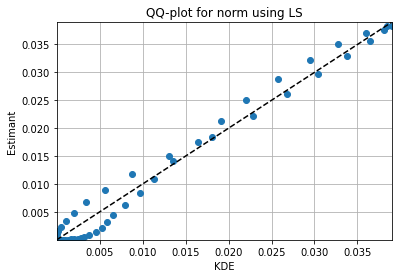

In [11]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

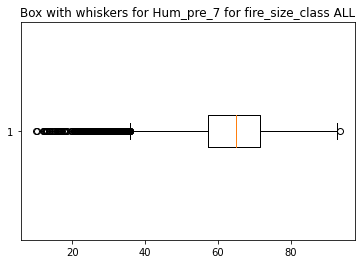

In [12]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()